# Lakshay Sharma

## Problem Statement: Using the K-Means Clustering to find the optimum clusters for the Iris Dataset

### Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

### Load Iris Dataset

In [2]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# Convert the dataset into DataFrame and use the first two columns for classification

df = pd.DataFrame({
    'x': iris.data[:,0],
    'y': iris.data[:,1],
    'cluster' : iris.target
})

# Show the first 5 rows

df.head()

,x,y,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


## Stage 1: Initialization Stage

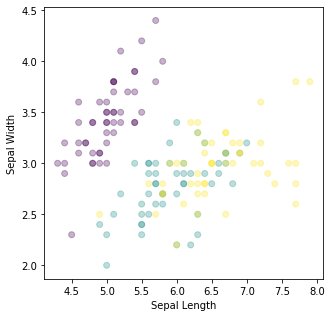

In [4]:
# We will plot the first two attributes (Sepal Length and Sepal Width) to create a scatter plot
fig = plt.figure(figsize = (5,5))
plt.scatter(df['x'],df['y'], c= iris.target, alpha = 0.3)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

### Defining and plotting the centroids  

In [5]:
np.unique(iris.target)

array([0, 1, 2])

In [6]:
# Since we have 3 unique targets, we will create 3 centroids basis on the mean of the first 2 columns of our dataframe

centroids = {}

for i in range(3):
    result_list = []
    result_list.append(df.loc[df['cluster'] == i]['x'].mean())
    result_list.append(df.loc[df['cluster'] == i]['y'].mean())
    
    centroids[i] = result_list
    
centroids

{0: [5.005999999999999, 3.428000000000001],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.9739999999999998]}

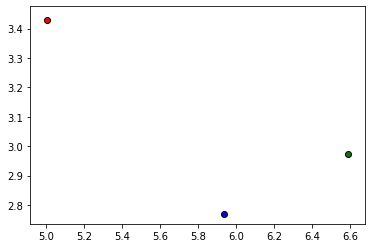

In [7]:
# Plotting the centroids with their respective color coding 
colmap = {0: 'r', 1: 'b', 2: 'g'}

for i in range(3):
    plt.scatter(centroids[i][0],centroids[i][1], color= colmap[i], edgecolor= 'black')
plt.show()

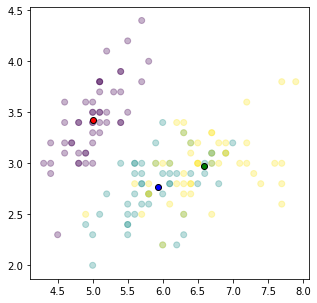

In [8]:
# We plot the dataset with the centroids

fig = plt.figure(figsize= (5,5))
plt.scatter(df['x'],df['y'], c= iris.target, alpha = 0.3)
colmap = {0: 'r', 1: 'b', 2: 'g'}

for i in range(3):
    plt.scatter(centroids[i][0],centroids[i][1], color= colmap[i], edgecolor= 'black')
plt.show()

## Stage 2: Assignment Stage

In [9]:
# We use the euclidean distance method to find the distance of each point from the centroids
def assignment(df, centroids):
    for i in range(3):
        # sqrt((x1-x2)^2 - (y1-y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x']- centroids[i][0]) **2 
                + (df['y'] - centroids[i][1]) **2
            )
        )
        
# finding the closest point from each centroid

    centroid_distance_cols= ['distance_from_{}'.format(i) for i in range(3)]
    
# we use idxmin function to find the minimum value from the column axis

    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1) 
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

### Using the above updated points to categorize our clusters

In [10]:
# Updating the dataframe
df = assignment(df, centroids)
df

,x,y,cluster,distance_from_0,distance_from_1,distance_from_2,closest,color
0,5.1,3.5,0,0.118406,1.109863,1.578233,0,r
1,4.9,3.0,0,0.440931,1.061224,1.688200,0,r
2,4.7,3.2,0,0.381602,1.308662,1.901478,0,r
3,4.6,3.1,0,0.521939,1.376153,1.991989,0,r
4,5.0,3.6,0,0.172105,1.250998,1.706933,0,r
...,...,...,...,...,...,...,...,...
145,6.7,3.0,2,1.747232,0.797870,0.114978,2,g
146,6.3,2.5,2,1.592363,0.453206,0.554635,1,b
147,6.5,3.0,2,1.554098,0.609094,0.091761,2,g
148,6.2,3.4,2,1.194328,0.683078,0.576212,2,g


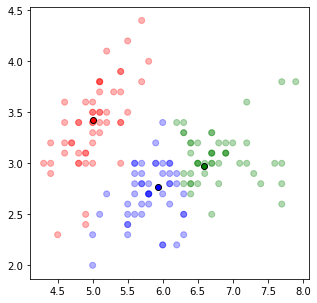

In [11]:
# Plotting the updated dataframe with the centroid and their closest points
fig = plt.figure(figsize= (5,5))
plt.scatter(df['x'],df['y'], color=df['color'], alpha = 0.3)

for i in centroids.keys():
    plt.scatter(*centroids[i], color= colmap[i], edgecolor= 'black')
plt.show()

## Stage 3: Update Stage

In [12]:

def update(k):
    for i in range(3):
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

In [13]:
centroids = update(centroids)
centroids

{0: [5.00943396226415, 3.383018867924529],
 1: [5.806122448979591, 2.693877551020408],
 2: [6.802083333333331, 3.0687499999999996]}

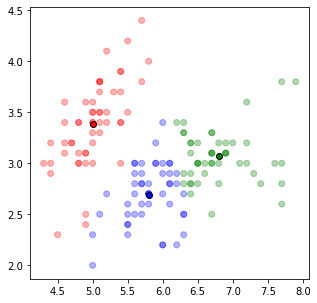

In [15]:
# Plotting the updated dataframe with the centroid and their closest points
fig = plt.figure(figsize= (5,5))
plt.scatter(df['x'],df['y'], color=df['color'], alpha = 0.3)

for i in range(3):
    plt.scatter(*centroids[i], color= colmap[i], edgecolor= 'black')
plt.show()